STEP 1: Loading Dataset from Local Colab Storage...

--- Data Inspection ---
Shape: (17000, 9) (Rows, Columns)

First 5 Rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Data Types:
<class 'pandas.core.frame.DataFr

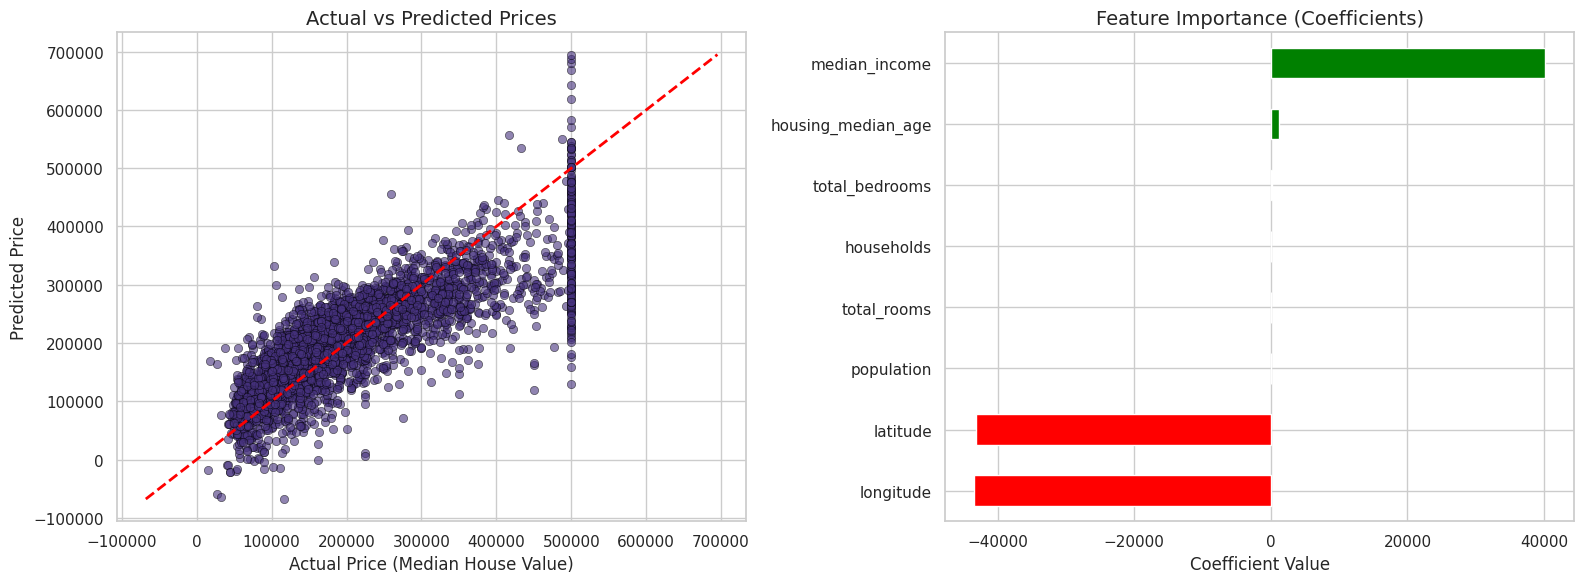

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SETTING VISUALIZATION THEME
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)

def load_and_inspect_data():
    """
    Loads the California Housing dataset directly from Colab's local sample_data folder.
    This bypasses the HTTP 403 Forbidden error from Scikit-Learn.
    """
    print("STEP 1: Loading Dataset from Local Colab Storage...")

    # Using the local file that exists in ALL Google Colab instances
    # This file is located at /content/sample_data/california_housing_train.csv
    try:
        df = pd.read_csv("/content/sample_data/california_housing_train.csv")
    except FileNotFoundError:
        # Fallback URL if running locally (not on Colab)
        url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
        df = pd.read_csv(url)

    # The target column in this CSV is named 'median_house_value'
    target_col = "median_house_value"

    # HINT 2: Basic Inspection
    print("\n--- Data Inspection ---")
    print(f"Shape: {df.shape} (Rows, Columns)")
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nData Types:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())

    return df, target_col

def perform_split(df, target_col):
    """
    Separates features and target, then splits into Train/Test sets.
    """
    print("\nSTEP 2: Splitting Data...")

    # HINT 3: Separate Input (X) and Target (y)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # HINT 4: Train-Test Split (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f" - Training Features: {X_train.shape}")
    print(f" - Testing Features:  {X_test.shape}")

    return X_train, X_test, y_train, y_test

def train_and_predict(X_train, X_test, y_train):
    """
    Trains the Linear Regression model and generates predictions.
    """
    print("\nSTEP 3: Training Linear Regression Model...")

    # HINT 5: Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # HINT 6: Predict on test data
    y_pred = model.predict(X_test)
    print(" - Model Training & Prediction Complete.")

    return model, y_pred

def evaluate_model(y_test, y_pred):
    """
    Calculates error metrics and displays comparison table.
    """
    print("\nSTEP 4: Model Evaluation...")

    # HINT 6: Comparison Table
    comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
    comparison_df['Error'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']

    print("\n--- Prediction Sample (First 5) ---")
    print(comparison_df.head())

    # HINT 7: MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("\n--- Performance Metrics ---")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"RMSE (Root Mean Sq Error): {rmse:.4f}")

    return comparison_df, mae, rmse

def visualize_results(y_test, y_pred, model, feature_names):
    """
    Generates plots for Actual vs Predicted and Feature Importance.
    """
    print("\nSTEP 5: Visualizing Results...")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # HINT 8: Predicted vs Actual Scatter Plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k', ax=axes[0])

    # Drawing the "Perfect Prediction" line (Red dashed)
    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    axes[0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

    axes[0].set_title('Actual vs Predicted Prices', fontsize=14)
    axes[0].set_xlabel('Actual Price (Median House Value)')
    axes[0].set_ylabel('Predicted Price')

    # HINT 9: Interpret Model Coefficients
    coeffs = pd.Series(model.coef_, index=feature_names)
    coeffs_sorted = coeffs.sort_values()

    # Color mapping: Green for Positive impact, Red for Negative
    colors = ['red' if x < 0 else 'green' for x in coeffs_sorted]

    coeffs_sorted.plot(kind='barh', color=colors, ax=axes[1])
    axes[1].set_title('Feature Importance (Coefficients)', fontsize=14)
    axes[1].set_xlabel('Coefficient Value')

    plt.tight_layout()
    plt.show()

# MAIN EXECUTION
if __name__ == "__main__":
    # 1. Load (Fixed to use local Colab file)
    df_data, target_name = load_and_inspect_data()

    # 2. Split
    X_train_set, X_test_set, y_train_set, y_test_set = perform_split(df_data, target_name)

    # 3. Train
    lr_model, predictions = train_and_predict(X_train_set, X_test_set, y_train_set)

    # 4. Evaluate
    evaluate_model(y_test_set, predictions)

    # 5. Visualize
    visualize_results(y_test_set, predictions, lr_model, X_train_set.columns)